In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import csv
from sklearn.decomposition import PCA
import umap
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import calinski_harabasz_score
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import matplotlib as mpl
import tkinter as tk
from tkinter import ttk
from math import sqrt
import soccerplots
from soccerplots.radar_chart import Radar  
from sklearn.model_selection import train_test_split

In [4]:
ages = range(15,45,1)
idade_minima = 39
ages_maior = [age for age in ages if age > idade_minima]

In [5]:
ages_maior 

[40, 41, 42, 43, 44]

In [1]:
import numpy as np
import math
from scipy import stats

from mplsoccer import PyPizza, add_image,FontManager
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings('ignore')

In [4]:
diretorio = 'C:\\Users\\Soeiro\\OneDrive\\Players_20230923'
files = os.listdir(diretorio)
    
arquivos_csv = [arquivo for arquivo in os.listdir(diretorio) if arquivo.endswith('.csv')]

i = 0

df_list = []
for arquivo in arquivos_csv:
    
    parts = arquivo.split("-")

    # Pegar o primeiro elemento (índice 0) da lista resultante
    nome_pais_liga = parts[0]
    
    caminho_arquivo = os.path.join(diretorio, arquivo)

    #print(caminho_arquivo)

    try:
        with open(caminho_arquivo , 'r', newline='') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            primeira_linha = next(leitor_csv, None)
            
            if primeira_linha is not None:

                df = pd.read_csv(caminho_arquivo)  
                df['league_country'] = nome_pais_liga.upper()
                df_list.append(df)
                
                
    except FileNotFoundError:
        print(f"O arquivo '{arquivo}' não foi encontrado.")
    except Exception as e:
        print(f"Ocorreu um erro ao tentar abrir o arquivo: {e}")
     
    
    
        
with open('features_selected.csv', newline='') as f:
    reader = csv.reader(f,delimiter = ';')
    data = list(reader)
    
features = [item[0] for item in data]
features.append('full_name')
features.append('position')
features.append('nationality')
features.append('league')
features.append('age')
features.append('Current Club')
features.append('birthday_GMT')

Ocorreu um erro ao tentar abrir o arquivo: 'charmap' codec can't decode byte 0x8d in position 7692: character maps to <undefined>
Ocorreu um erro ao tentar abrir o arquivo: 'charmap' codec can't decode byte 0x81 in position 7769: character maps to <undefined>
Ocorreu um erro ao tentar abrir o arquivo: 'charmap' codec can't decode byte 0x81 in position 7684: character maps to <undefined>
Ocorreu um erro ao tentar abrir o arquivo: 'charmap' codec can't decode byte 0x8d in position 7763: character maps to <undefined>


In [5]:
df_final = pd.concat(df_list, ignore_index=True).fillna(0)
df_final.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,clean_sheets_percentage_percentile_overall,min_per_card_percentile_overall,cards_per90_percentile_overall,booked_over05_overall,booked_over05_percentage_overall,booked_over05_percentage_percentile_overall,shirt_number,annual_salary_gbp,annual_salary_usd,league_country
0,Adriatik Basha,24,920016000,1999/02/26,First Division,2022/2023,Defender,Lushnja,90,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ALBANIA
1,Akhmed Bunkhoev,22,978336000,2001/01/01,First Division,2022/2023,Goalkeeper,Oriku,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ALBANIA
2,Albi Metani,20,1061622000,2003/08/23,First Division,2022/2023,Forward,Turbina Cërrik,44,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ALBANIA
3,Albi Xhabrahimi,27,843202800,1996/09/20,First Division,2022/2023,Forward,Tërbuni Pukë,18,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ALBANIA
4,Aldo Llambro,27,834044400,1996/06/06,First Division,2022/2023,Midfielder,Oriku,90,90,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ALBANIA


In [6]:
df_aust_fw = df_final[(df_final['position'] == 'Forward') & (df_final['league_country'] == 'AUSTRALIA')].reset_index().drop(columns = ['index'])

In [7]:
df_aust_fw.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,clean_sheets_percentage_percentile_overall,min_per_card_percentile_overall,cards_per90_percentile_overall,booked_over05_overall,booked_over05_percentage_overall,booked_over05_percentage_percentile_overall,shirt_number,annual_salary_gbp,annual_salary_usd,league_country
0,Adam Jake Taggart,30,739004400,1993/06/02,A-League,2022/2023,Forward,Perth Glory FC,802,465,...,19.0,54.0,58.0,2.0,15.0,61.0,22.0,0.0,0.0,AUSTRALIA
1,Adam Le Fondre,36,533894400,1986/12/02,A-League,2022/2023,Forward,Sydney FC,1430,624,...,31.0,12.0,12.0,0.0,0.0,11.0,9.0,0.0,0.0,AUSTRALIA
2,Adam Zimarino,22,984643200,2001/03/15,A-League,2022/2023,Forward,Perth Glory FC,424,212,...,5.0,57.0,55.0,1.0,0.0,11.0,43.0,0.0,0.0,AUSTRALIA
3,Al Hassan Toure,23,959670000,2000/05/30,A-League,2022/2023,Forward,Macarthur,1264,653,...,42.0,77.0,35.0,2.0,9.0,36.0,35.0,0.0,0.0,AUSTRALIA
4,Aleksandar Prijović,33,640681200,1990/04/21,A-League,2022/2023,Forward,Western United,1149,553,...,31.0,52.0,60.0,3.0,19.0,73.0,99.0,0.0,0.0,AUSTRALIA


In [8]:
# Calcule a mediana e o terceiro quartil para cada coluna
median_values = df_aust_fw.median()
q3_values = df_aust_fw.quantile(0.75)

In [9]:
# Identifique as colunas em que o terceiro quartil é maior que zero
selected_columns = list(q3_values[q3_values > 0].index)

In [10]:
selected_columns.append('full_name')
selected_columns.append('position')

In [11]:
selected_columns

['age',
 'birthday',
 'minutes_played_overall',
 'minutes_played_home',
 'minutes_played_away',
 'appearances_overall',
 'appearances_home',
 'appearances_away',
 'goals_overall',
 'goals_home',
 'goals_away',
 'assists_overall',
 'assists_home',
 'assists_away',
 'clean_sheets_overall',
 'clean_sheets_home',
 'clean_sheets_away',
 'conceded_overall',
 'conceded_home',
 'conceded_away',
 'yellow_cards_overall',
 'goals_involved_per_90_overall',
 'assists_per_90_overall',
 'goals_per_90_overall',
 'goals_per_90_home',
 'goals_per_90_away',
 'min_per_goal_overall',
 'conceded_per_90_overall',
 'min_per_conceded_overall',
 'min_per_match',
 'min_per_card_overall',
 'min_per_assist_overall',
 'cards_per_90_overall',
 'rank_in_league_top_attackers',
 'rank_in_league_top_midfielders',
 'rank_in_club_top_scorer',
 'average_rating_overall',
 'assists_per_game_overall',
 'sm_assists_total_overall',
 'assists_per90_percentile_overall',
 'passes_per_90_overall',
 'passes_per_game_overall',
 'pass

In [12]:
selected_columns.remove('rank_in_league_top_attackers')
selected_columns.remove('rank_in_league_top_midfielders')
selected_columns.remove('rank_in_club_top_scorer')
selected_columns.remove('age')
selected_columns.remove('birthday')
selected_columns.remove('annual_salary_eur')
selected_columns.remove('annual_salary_eur_percentile')

In [53]:
selected_columns

['minutes_played_overall',
 'minutes_played_home',
 'minutes_played_away',
 'appearances_overall',
 'appearances_home',
 'appearances_away',
 'goals_overall',
 'goals_home',
 'goals_away',
 'assists_overall',
 'assists_home',
 'assists_away',
 'clean_sheets_overall',
 'clean_sheets_home',
 'clean_sheets_away',
 'conceded_overall',
 'conceded_home',
 'conceded_away',
 'yellow_cards_overall',
 'goals_involved_per_90_overall',
 'assists_per_90_overall',
 'goals_per_90_overall',
 'goals_per_90_home',
 'goals_per_90_away',
 'min_per_goal_overall',
 'conceded_per_90_overall',
 'min_per_conceded_overall',
 'min_per_match',
 'min_per_card_overall',
 'min_per_assist_overall',
 'cards_per_90_overall',
 'average_rating_overall',
 'assists_per_game_overall',
 'sm_assists_total_overall',
 'assists_per90_percentile_overall',
 'passes_per_90_overall',
 'passes_per_game_overall',
 'passes_per90_percentile_overall',
 'passes_total_overall',
 'passes_completed_per_game_overall',
 'passes_completed_total

In [129]:
selected_columns

['minutes_played_overall',
 'minutes_played_home',
 'minutes_played_away',
 'appearances_overall',
 'appearances_home',
 'appearances_away',
 'goals_overall',
 'goals_home',
 'goals_away',
 'assists_overall',
 'assists_home',
 'assists_away',
 'clean_sheets_overall',
 'clean_sheets_home',
 'clean_sheets_away',
 'conceded_overall',
 'conceded_home',
 'conceded_away',
 'yellow_cards_overall',
 'goals_involved_per_90_overall',
 'assists_per_90_overall',
 'goals_per_90_overall',
 'goals_per_90_home',
 'goals_per_90_away',
 'min_per_goal_overall',
 'conceded_per_90_overall',
 'min_per_conceded_overall',
 'min_per_match',
 'min_per_card_overall',
 'min_per_assist_overall',
 'cards_per_90_overall',
 'average_rating_overall',
 'assists_per_game_overall',
 'sm_assists_total_overall',
 'assists_per90_percentile_overall',
 'passes_per_90_overall',
 'passes_per_game_overall',
 'passes_per90_percentile_overall',
 'passes_total_overall',
 'passes_completed_per_game_overall',
 'passes_completed_total

In [13]:
df_aust_fw = df_aust_fw.loc[:, df_aust_fw.columns.isin(selected_columns)]

In [14]:
df_aust_fw.head()

,full_name,position,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,...,goals_involved_per90_percentile_overall,goals_per90_percentile_overall,goals_per90_percentile_away,goals_per90_percentile_home,clean_sheets_percentage_percentile_overall,min_per_card_percentile_overall,cards_per90_percentile_overall,booked_over05_overall,booked_over05_percentage_overall,booked_over05_percentage_percentile_overall
0,Adam Jake Taggart,Forward,802,465,337,13,8,5,5,5,...,92.0,97.0,58.0,99.0,19.0,54.0,58.0,2.0,15.0,61.0
1,Adam Le Fondre,Forward,1430,624,806,21,10,11,12,6,...,98.0,99.0,97.0,98.0,31.0,12.0,12.0,0.0,0.0,11.0
2,Adam Zimarino,Forward,424,212,212,16,9,7,2,1,...,84.0,93.0,92.0,90.0,5.0,57.0,55.0,1.0,0.0,11.0
3,Al Hassan Toure,Forward,1264,653,611,23,12,11,3,2,...,92.0,79.0,73.0,82.0,42.0,77.0,35.0,2.0,9.0,36.0
4,Aleksandar Prijović,Forward,1149,553,596,16,8,8,5,3,...,88.0,92.0,87.0,93.0,31.0,52.0,60.0,3.0,19.0,73.0


In [15]:
params = selected_columns
params.remove('full_name')
params.remove('position')

# Irankunda

In [67]:
player = df_aust_fw[df_aust_fw['full_name'] == 'Nestory Irankunda'].reset_index().drop(columns = ['index'])

In [71]:
player = list(player.loc[0])[2:]

In [78]:
values = []
dict_params = {}
dict_values = {}
for x in range(len(params)):
    if player[x] > 0:
        parametro = params[x]
        dict_params[parametro] = player[x]
        dict_values[parametro] = math.floor(stats.percentileofscore(df_aust_fw[params[x]],player[x]))
        values.append(math.floor(stats.percentileofscore(df_aust_fw[params[x]],player[x])))

In [79]:
dict_values

{'minutes_played_overall': 46,
 'minutes_played_home': 43,
 'minutes_played_away': 47,
 'appearances_overall': 68,
 'appearances_home': 75,
 'appearances_away': 61,
 'goals_overall': 78,
 'goals_home': 69,
 'goals_away': 84,
 'assists_overall': 69,
 'assists_away': 85,
 'clean_sheets_overall': 24,
 'clean_sheets_home': 36,
 'conceded_overall': 23,
 'conceded_home': 30,
 'conceded_away': 21,
 'yellow_cards_overall': 99,
 'goals_involved_per_90_overall': 95,
 'assists_per_90_overall': 88,
 'goals_per_90_overall': 93,
 'goals_per_90_home': 84,
 'goals_per_90_away': 96,
 'min_per_goal_overall': 31,
 'conceded_per_90_overall': 12,
 'min_per_conceded_overall': 100,
 'min_per_match': 28,
 'min_per_card_overall': 36,
 'min_per_assist_overall': 59,
 'cards_per_90_overall': 94,
 'assists_per90_percentile_overall': 88,
 'shots_per90_percentile_overall': 15,
 'shots_on_target_per90_percentile_overall': 16,
 'shots_off_target_per90_percentile_overall': 17,
 'games_subbed_in': 98,
 'tackles_per90_pe

In [80]:
dict_params

{'minutes_played_overall': 580,
 'minutes_played_home': 266,
 'minutes_played_away': 314,
 'appearances_overall': 22,
 'appearances_home': 12,
 'appearances_away': 10,
 'goals_overall': 5,
 'goals_home': 2,
 'goals_away': 3,
 'assists_overall': 2,
 'assists_away': 2,
 'clean_sheets_overall': 1,
 'clean_sheets_home': 1,
 'conceded_overall': 3,
 'conceded_home': 2,
 'conceded_away': 1,
 'yellow_cards_overall': 8,
 'goals_involved_per_90_overall': 1.09,
 'assists_per_90_overall': 0.31,
 'goals_per_90_overall': 0.78,
 'goals_per_90_home': 0.68,
 'goals_per_90_away': 0.86,
 'min_per_goal_overall': 116,
 'conceded_per_90_overall': 0.47,
 'min_per_conceded_overall': 193,
 'min_per_match': 26,
 'min_per_card_overall': 73,
 'min_per_assist_overall': 290,
 'cards_per_90_overall': 1.24,
 'assists_per90_percentile_overall': 96.0,
 'shots_per90_percentile_overall': 10.0,
 'shots_on_target_per90_percentile_overall': 17.0,
 'shots_off_target_per90_percentile_overall': 12.0,
 'games_subbed_in': 22.0,


In [94]:
params =['goals_overall',
'assists_per_90_overall',
'goals_involved_per_90_overall',
'appearances_overall',
'through_passes_per90_percentile_overall',
'shot_conversion_rate_percentile_overall',
'min_per_goal_percentile_overall',
'dribbled_past_per90_percentile_overall']

In [82]:
len(dict_values)

77

In [95]:
params =['goals_overall',
'assists_per_90_overall',
'goals_involved_per_90_overall',
'appearances_overall',
'through_passes_per90_percentile_overall',
'shot_conversion_rate_percentile_overall',
'min_per_goal_percentile_overall',
'dribbled_past_per90_percentile_overall']


values = []
for x in range(len(params)):
    param = params_irankunda[x]
    values.append(dict_values[param])

In [103]:
params_alias =['Gols - Total',
'Assistências',
'Participações em Gols',
'Partidas Jogadas',
'Passes Completos',
'Conversão de Chutes',
'Minutos Por Gol',
'Dribles Completos Por Partida']

In [104]:
baker = PyPizza(
    params=params_alias,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

In [24]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

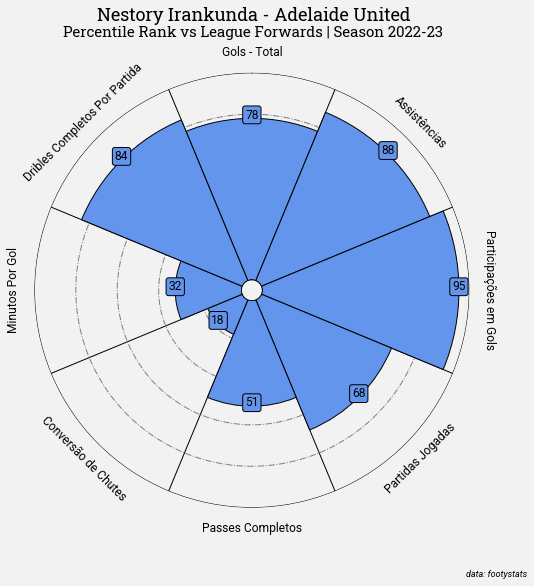

In [108]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)



# add title
fig.text(
    0.515, 0.97, "Nestory Irankunda - Adelaide United", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs League Forwards | Season 2022-23",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: footystats"

fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()


# Max Caputo

In [109]:
player = df_aust_fw[df_aust_fw['full_name'] == 'Max Caputo'].reset_index().drop(columns = ['index'])

In [110]:
player = list(player.loc[0])[2:]

In [130]:
values = []
dict_params = {}
dict_values = {}
for x in range(len(selected_columns)):
    if player[x] > 0:
        parametro = selected_columns[x]
        dict_params[parametro] = player[x]
        dict_values[parametro] = math.floor(stats.percentileofscore(df_aust_fw[selected_columns[x]],player[x]))
        values.append(math.floor(stats.percentileofscore(df_aust_fw[selected_columns[x]],player[x])))

In [131]:
dict_values

{'minutes_played_overall': 31,
 'minutes_played_home': 38,
 'minutes_played_away': 28,
 'appearances_overall': 27,
 'appearances_home': 27,
 'appearances_away': 27,
 'goals_overall': 62,
 'goals_home': 47,
 'goals_away': 72,
 'conceded_overall': 52,
 'conceded_home': 59,
 'conceded_away': 39,
 'goals_involved_per_90_overall': 82,
 'goals_per_90_overall': 88,
 'goals_per_90_home': 66,
 'goals_per_90_away': 98,
 'min_per_goal_overall': 36,
 'conceded_per_90_overall': 93,
 'min_per_conceded_overall': 19,
 'min_per_match': 42,
 'assists_per90_percentile_overall': 25,
 'shots_per90_percentile_overall': 15,
 'shots_on_target_per90_percentile_overall': 16,
 'shots_off_target_per90_percentile_overall': 17,
 'games_subbed_out': 47,
 'games_subbed_in': 43,
 'games_started': 42,
 'tackles_per90_percentile_overall': 14,
 'tackles_successful_per90_percentile_overall': 51,
 'interceptions_per90_percentile_overall': 18,
 'cross_completion_rate_percentile_overall': 25,
 'crosses_per90_percentile_overa

In [132]:
dict_params

{'minutes_played_overall': 376,
 'minutes_played_home': 225,
 'minutes_played_away': 151,
 'appearances_overall': 9,
 'appearances_home': 5,
 'appearances_away': 4,
 'goals_overall': 3,
 'goals_home': 1,
 'goals_away': 2,
 'conceded_overall': 10,
 'conceded_home': 6,
 'conceded_away': 4,
 'goals_involved_per_90_overall': 0.72,
 'goals_per_90_overall': 0.72,
 'goals_per_90_home': 0.4,
 'goals_per_90_away': 1.19,
 'min_per_goal_overall': 125,
 'conceded_per_90_overall': 2.39,
 'min_per_conceded_overall': 38,
 'min_per_match': 42,
 'assists_per90_percentile_overall': 43.0,
 'shots_per90_percentile_overall': 10.0,
 'shots_on_target_per90_percentile_overall': 17.0,
 'shots_off_target_per90_percentile_overall': 12.0,
 'games_subbed_out': 2.0,
 'games_subbed_in': 4.0,
 'games_started': 5.0,
 'tackles_per90_percentile_overall': 5.0,
 'tackles_successful_per90_percentile_overall': 99.0,
 'interceptions_per90_percentile_overall': 8.0,
 'cross_completion_rate_percentile_overall': 29.0,
 'crosses_

In [137]:
params =['goals_overall',
'shot_conversion_rate_percentile_overall',
'goals_involved_per_90_overall',
'dispossesed_per90_percentile_overall',
'assists_per90_percentile_overall',
 'goals_per90_percentile_overall',
 'min_per_goal_percentile_overall'
]


values = []
for x in range(len(params)):
    param = params[x]
    values.append(dict_values[param])

In [139]:
params_alias =['Gols - Total',
'Conversão de chutes',
'Participações em Gols - 90 min',
'Desarmes',
'Assistências - 90 min',
 'Gols a cada 90 minutos',
 'Minutos Por Gol'
]


In [140]:
baker = PyPizza(
    params=params_alias,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

In [141]:
values

[62, 18, 82, 86, 25, 94, 32]

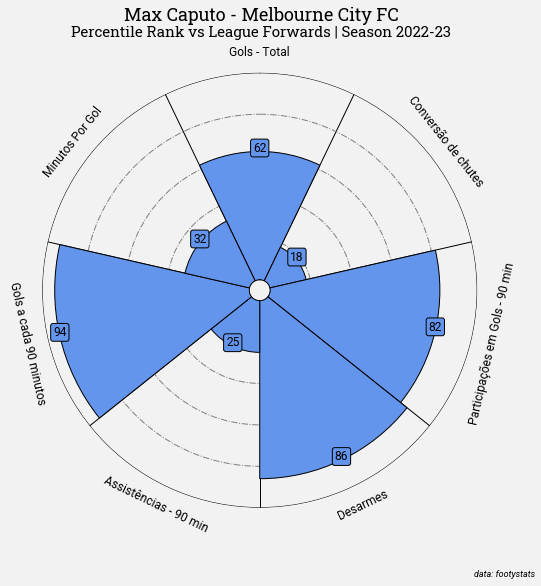

In [142]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)



# add title
fig.text(
    0.515, 0.97, "Max Caputo - Melbourne City FC", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs League Forwards | Season 2022-23",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: footystats"

fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()


# Luka Jovanovic

In [9]:
player = df_aust_fw[df_aust_fw['full_name'] == 'Luka Jovanovic'].reset_index().drop(columns = ['index'])
#player = list(player.loc[0])[2:]

In [12]:
player.min_per_goal_overall

0    125
Name: min_per_goal_overall, dtype: int64

In [148]:
player

[376,
 225,
 151,
 9,
 5,
 4,
 3,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 4,
 0,
 0.72,
 0.0,
 0.72,
 0.4,
 1.19,
 125,
 2.39,
 38,
 42,
 0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 43.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10.0,
 0.0,
 0.0,
 17.0,
 0.0,
 0.0,
 12.0,
 2.0,
 4.0,
 5.0,
 5.0,
 99.0,
 0.0,
 0.0,
 8.0,
 0.0,
 29.0,
 0.0,
 14.0,
 99.0,
 0.0,
 7.0,
 0.0,
 0.0,
 8.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 17.0,
 0.0,
 99.0,
 0.0,
 0.0,
 0.0,
 11.0,
 11.0,
 0.0,
 0.0,
 0.0,
 23.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 39.0,
 0.0,
 1.0,
 9.0,
 41.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 14.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0,
 0.0,
 0.0,
 13.0,
 0.0,
 2.0,
 67.0,
 39.0,
 2.0,
 99.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99.0,
 0.0,
 99.0,
 0.0,
 0.0,
 0.0,
 2

In [17]:
values = []
dict_params = {}
dict_values = {}
for x in range(len(selected_columns)):
    if player[x] > 0:
        parametro = selected_columns[x]
        dict_params[parametro] = player[x]
        dict_values[parametro] = math.floor(stats.percentileofscore(df_aust_fw[selected_columns[x]],player[x]))
        values.append(math.floor(stats.percentileofscore(df_aust_fw[selected_columns[x]],player[x])))

In [18]:
dict_values

{'minutes_played_overall': 31,
 'minutes_played_home': 38,
 'minutes_played_away': 28,
 'appearances_overall': 27,
 'appearances_home': 27,
 'appearances_away': 27,
 'goals_overall': 62,
 'goals_home': 47,
 'goals_away': 72,
 'conceded_overall': 52,
 'conceded_home': 59,
 'conceded_away': 39,
 'goals_involved_per_90_overall': 82,
 'goals_per_90_overall': 88,
 'goals_per_90_home': 66,
 'goals_per_90_away': 98,
 'min_per_goal_overall': 36,
 'conceded_per_90_overall': 93,
 'min_per_conceded_overall': 19,
 'min_per_match': 42,
 'assists_per90_percentile_overall': 25,
 'shots_per90_percentile_overall': 15,
 'shots_on_target_per90_percentile_overall': 16,
 'shots_off_target_per90_percentile_overall': 17,
 'games_subbed_out': 47,
 'games_subbed_in': 43,
 'games_started': 42,
 'tackles_per90_percentile_overall': 14,
 'tackles_successful_per90_percentile_overall': 51,
 'interceptions_per90_percentile_overall': 18,
 'cross_completion_rate_percentile_overall': 25,
 'crosses_per90_percentile_overa

In [19]:
params =[ 'goals_overall','goals_involved_per_90_overall', 'dispossesed_per90_percentile_overall',
         'tackles_successful_per90_percentile_overall', 'min_per_goal_percentile_overall', 'dribbled_past_per90_percentile_overall']


values = []
for x in range(len(params)):
    param = params[x]
    values.append(dict_values[param])

In [20]:
values

[62, 82, 86, 51, 32, 84]

In [21]:
params_alias =['Gols - Total',
'Participações em Gols - 90 min',
'Desarmes',
'Confrontos - Bem Sucedidos',
'Minutos Por Gol',
'Dribles Bem Sucedidos'
]


In [22]:
baker = PyPizza(
    params=params_alias,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

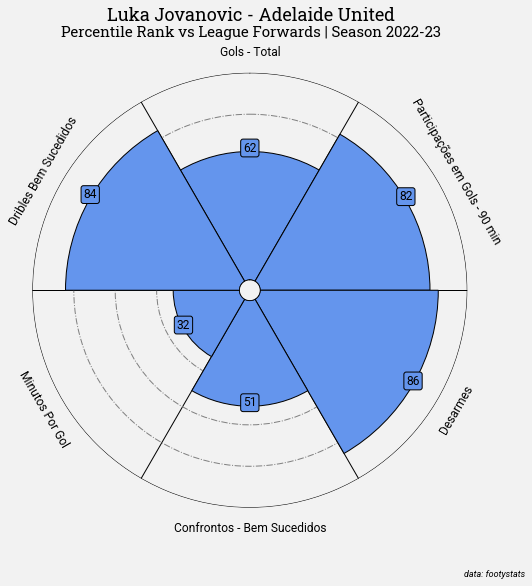

In [25]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)



# add title
fig.text(
    0.515, 0.97, "Luka Jovanovic - Adelaide United", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs League Forwards | Season 2022-23",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: footystats"

fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()
